# Accessing the Quality of wine through Exploratory data analysis

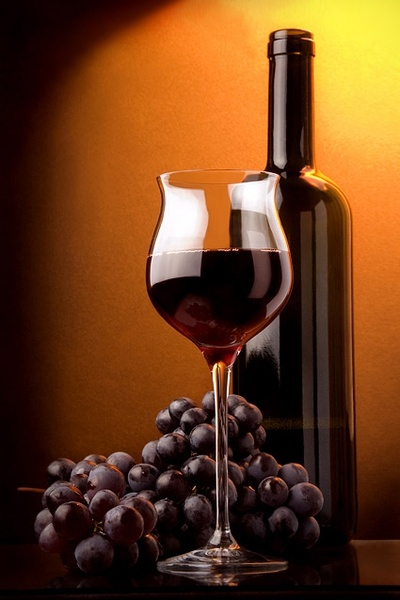

Disclaimer: The images are only for illustration purpose. Please don't compare them with the data.

<a id=section1></a>
## 1.Problem Definition

Traditionally the quality of the wine is determined only by **tasting** it and rating the **quality grade between 1-10**. 
So it is very difficult to assess the quality of **wine** just by reading the label. 

What if, we can produce **best quality wine** by precisely controlling its ingredients?

But as we have **dataset which contains different ingredient of wine** and also we have **Quality of Wine** column. So based on that, we will try to find out what should be level of various ingredients to **get the best quality of wine.**

We will also try to find out which are the **ingredients, that needs to be controlled to achieve highest quality?**


<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.
from pandas_profiling import ProfileReport

In [3]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
#import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

<a id=section3></a>
## 3.Loading the Data

We will be using the data from **INSAID** for our EDA

In [4]:
df_wine=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv')
df_wine.head() #importing data and displaying first 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<a id=section301></a>
## 3.1 Description of the dataset

This dataset provides information about **wine's** ingredients like citric acid, chloride, sulfur dioxide, density, PH, alcohol etc.

| **Column Name** | | **Description** |
|-------------| |-------------|
|Fixed acidity|	|Most acids involved with wine or fixed or non-volatile (do not evaporate readily)(tartaric acid - g / dm^3)|
|Volatile acidity| |The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste(acetic acid - g / dm^3)|
|Citric acid|	|Found in small quantities, citric acid can add ‘freshness’ and flavour to wines (g / dm^3)|
|Residual sugar|	|The amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/litre and wines with greater than 45 grams/litre are considered sweet  (g / dm^3)|
|Chlorides|	|The amount of salt in the wine (sodium chloride - g / dm^3)|
|Free sulphur dioxide|	|Free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfide ion. It prevents microbial growth and the oxidation of wine.(mg / dm^3)|
|Total sulphur dioxide|	|Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine (mg / dm^3)|
|Density|	|The density of water is close to that of water depending on the percent alcohol and sugar content (g / cm^3)|
|pH|	|Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.|
|Sulphates|	|A wine additive which can contribute to sulphur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant (potassium sulphate - g / dm3)|
|Alcohol|	|The percent alcohol content of the wine. (% by volume)|
|Quality|	|Score between 0 to 10|



<a id=section302></a>
## 3.2 Understanding the data information through ```.info()```

In [5]:
df_wine.info() # understanding the number of rows, columns and datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


Correcting the spelling of **sulphur**

In [6]:
df_wine=df_wine.rename(columns={'free sulfur dioxide':'free sulphur dioxide','total sulfur dioxide':'total sulphur dioxide'})

### From the above , ```.info()``` function, we understood the following;
- There are 11 columns with 10 columns having ```float``` datatype and balance one column having ```int``` datatype
- There are **6,497** rows of data
- The data seem to have no **missing values**

<a id=section303></a>
## 3.3 Describing the data using ```.describe()``` function 

In [7]:
df_wine.describe() #describe function to check if anything out of the box

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulphur dioxide,total sulphur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


####  From the above ```df_wine.describe()``` function we infer the following;
- **Citric Acid** column is having an almost normal distribution because the mean (0.318633) value is close to the median (0.310000) value.
- The **Density** column data is also normally distributed because of the mean (0.994697) is very close to its median (0.994890).
- We also notice that **pH** column is also normally distributed as the mean (3.218501) is very close to its median (3.210000).
- The mean sugar lever is 5.4 g/l. This is mainly because of the outlier of 65.8g/l in the data. 
- Mean free sulfur dioxide is 30.5 ppm. Max value is 289ppm which is quite high as 75% is 41 ppm. 

<a id=section4></a>
##  4. Pandas Profiling before Data Pre-processing

In [8]:
profile=ProfileReport(df_wine)
profile.to_file(output_file='wine_data_preprofiling.html') #generating the profiling report to check what needs to be cleaned

<a id=section401></a>
### 4.1 Observations from **Profile Report** of Pandas Profiling:
- **Citric acid** columns contains 151 (2.3%) zeros - <font color = blue> This can be ignored as the other values are very close to 0. If we delete these downs, we may loose lot of valuable data. </Font>
- **Dataset has 1179 (18.1%) duplicate rows** - <font color = blue>  We will analyse the duplicate rows and remove them.</Font>
- All the columns are numeric in Nature

<a id=section402></a>
### 4.2 Analysing the duplicate values

In [9]:
df_wine[df_wine.duplicated()] #to display all the duplicate values with their indexes

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulphur dioxide,total sulphur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.900000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6427,6.4,0.230,0.35,10.30,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
6449,7.0,0.360,0.35,2.50,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
6450,6.4,0.330,0.44,8.90,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
6455,7.1,0.230,0.39,13.70,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


In [10]:
df_wine[df_wine['fixed acidity']==7.5].iloc[:2]#comparing data to understand if it is really duplicate

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulphur dioxide,total sulphur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5
11,7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5


In [11]:
df_wine[df_wine['fixed acidity']==7.4].iloc[:2] #comparing data to understand if it is really duplicate

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulphur dioxide,total sulphur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Inference**


As you can see above there are two entries of exact same values. They are having **duplicate** values in  the data which may bias the output. Therefore it is best to delete these duplicate rows

<a id=section403></a>

### 4.3 Removing duplicates

In [12]:
df_wine.drop_duplicates(inplace=True) #deleting duplicate rows

In [13]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulphur dioxide,total sulphur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


<a id=section404></a>

## 4.4 Fixing the indexes after removing the duplicates

In [14]:
df_wine.reset_index(inplace=True) #resetting the index after deleting duplicate values

In [15]:
df_wine.drop('index',axis =1,inplace=True )# deleting index which came out automatically

In [16]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulphur dioxide,total sulphur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5313,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
5314,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
5315,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
5316,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


As you can see above, the index values are fixed

<a id=section5></a>
##  5. Pandas Profiling after Data Pre-processing

In [18]:
#profile=ProfileReport(df_wine,)
#profile.to_file(output_file='Pandas_profiling_after_Data_Processing.html') #genetating profil report to study if the data is clean

<a id=section501></a>
### 5.1 Observation from Post Profiling;
From the Pandas Profile Report after post processing, we noticed that all the issues mentioned in pre profiling has been resolved and now the **wine data** is ready to cary out **Data Analysis**

<a id=section6></a>

## 6. Data Analysis



In this section we will explore the data in and out to understand its behaviour. First, we will analyse individual columns and then see how each column is related with wine quality

In [19]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulphur dioxide,total sulphur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [20]:
cols=['fixed acidity','volatile acidity','citric acid','residual sugar'
      ,'chlorides','free sulphur dioxide','total sulphur dioxide','density',
      'pH','sulphates','alcohol','quality'] # extracting all the columns into a list

In [21]:
df_wine.describe() # trying to find out the data behaviour after cleaning

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulphur dioxide,total sulphur dioxide,density,pH,sulphates,alcohol,quality
count,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000
mean,7.215523,0.344171,0.318522,5.049605,0.056700,30.030463,114.107747,0.994536,3.224639,0.533402,10.549222,5.795600
std,1.319777,0.168264,0.147177,4.500645,0.036865,17.804365,56.783848,0.002966,0.160403,0.149753,1.185964,0.879715
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994660,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.750000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<a id=section601></a>
### 6.1. Univariant analysis

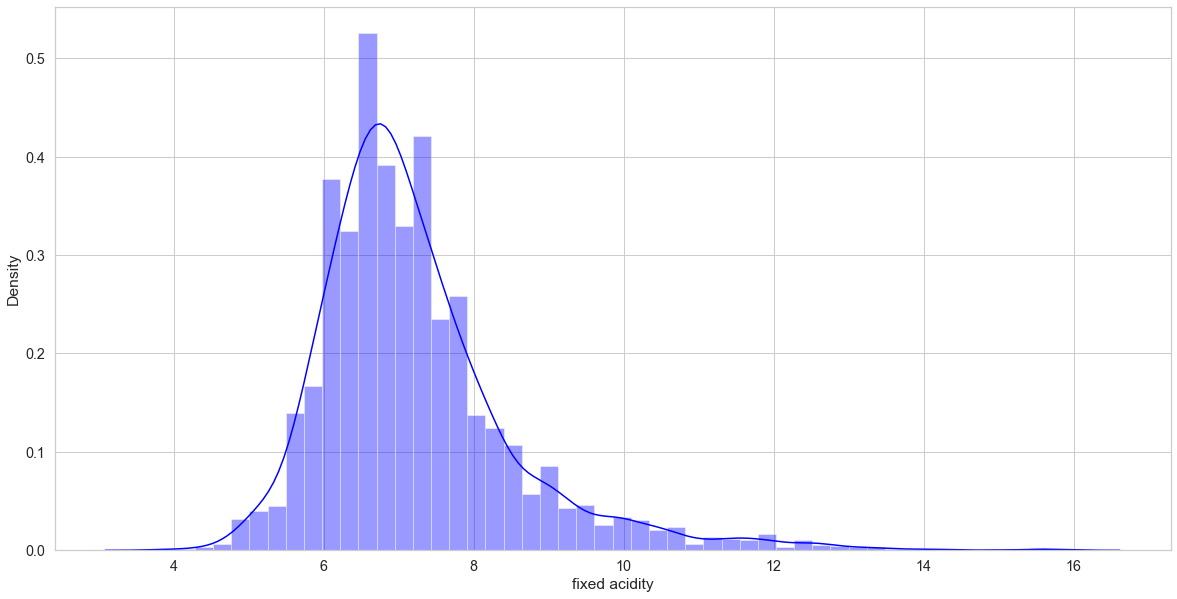

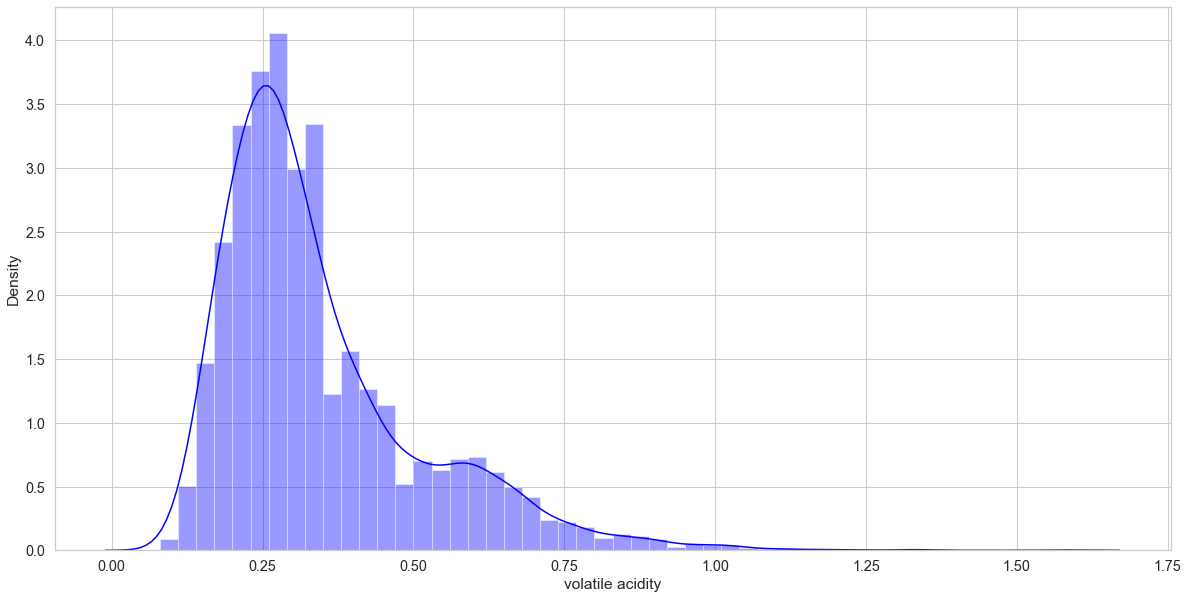

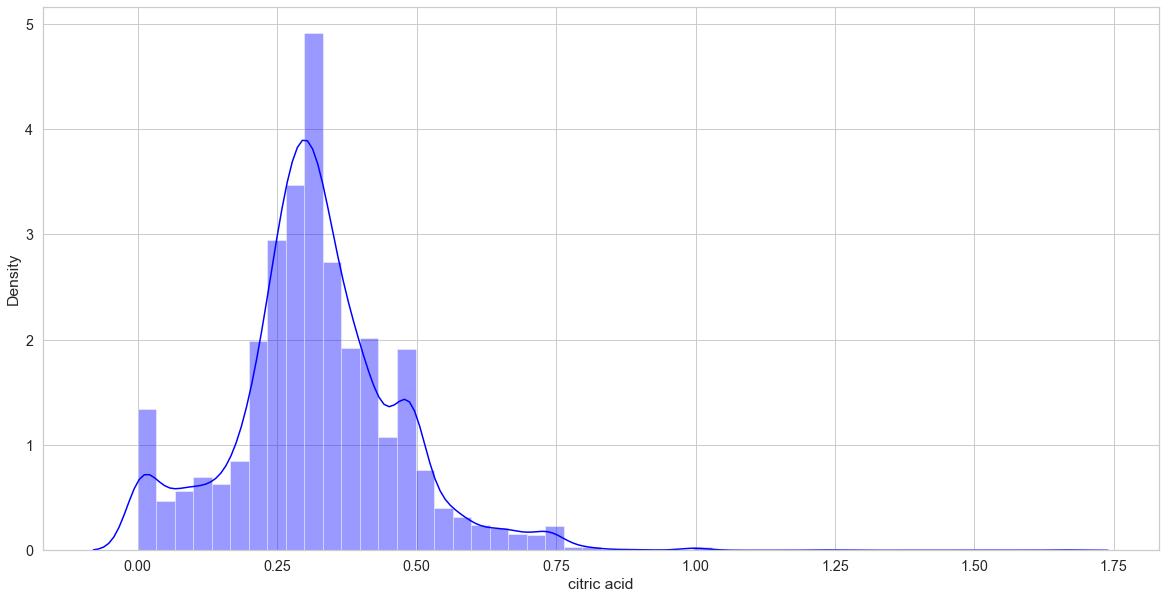

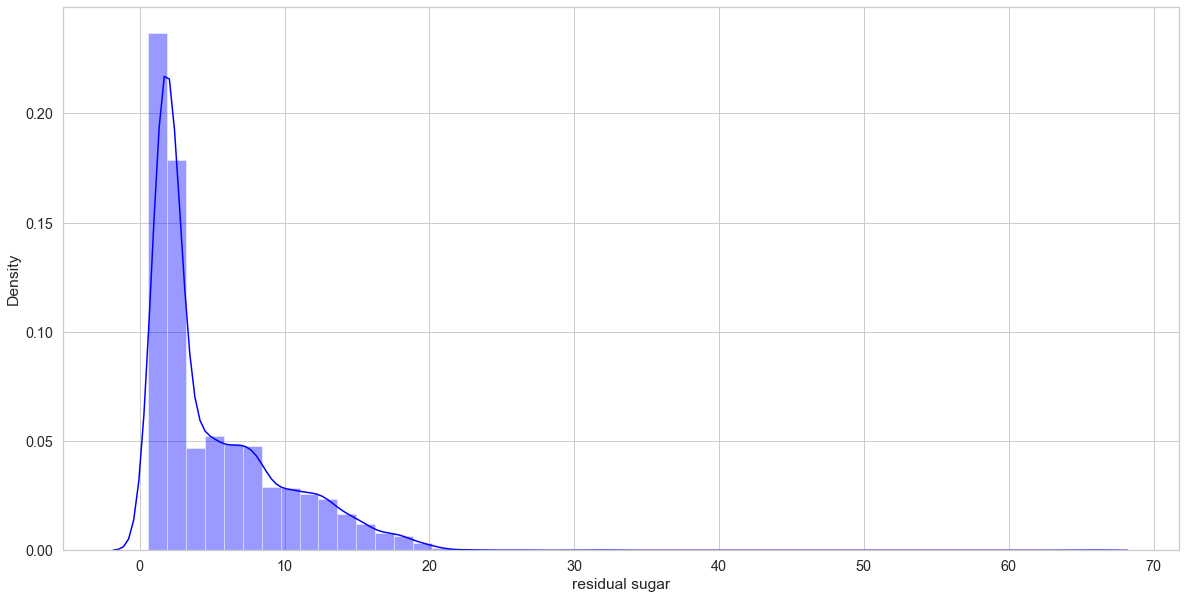

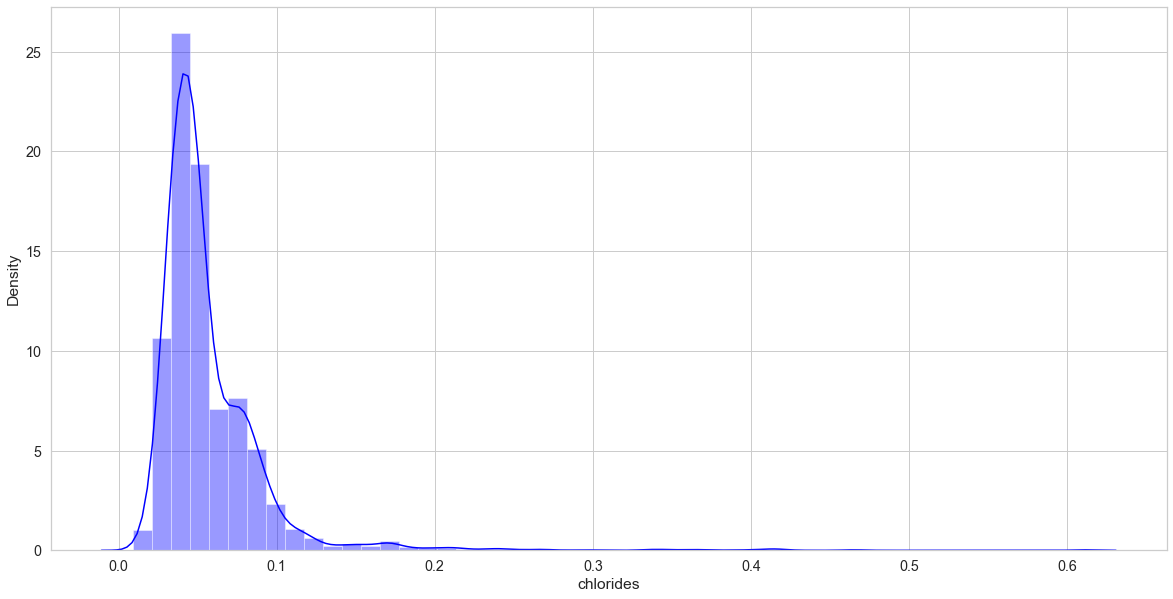

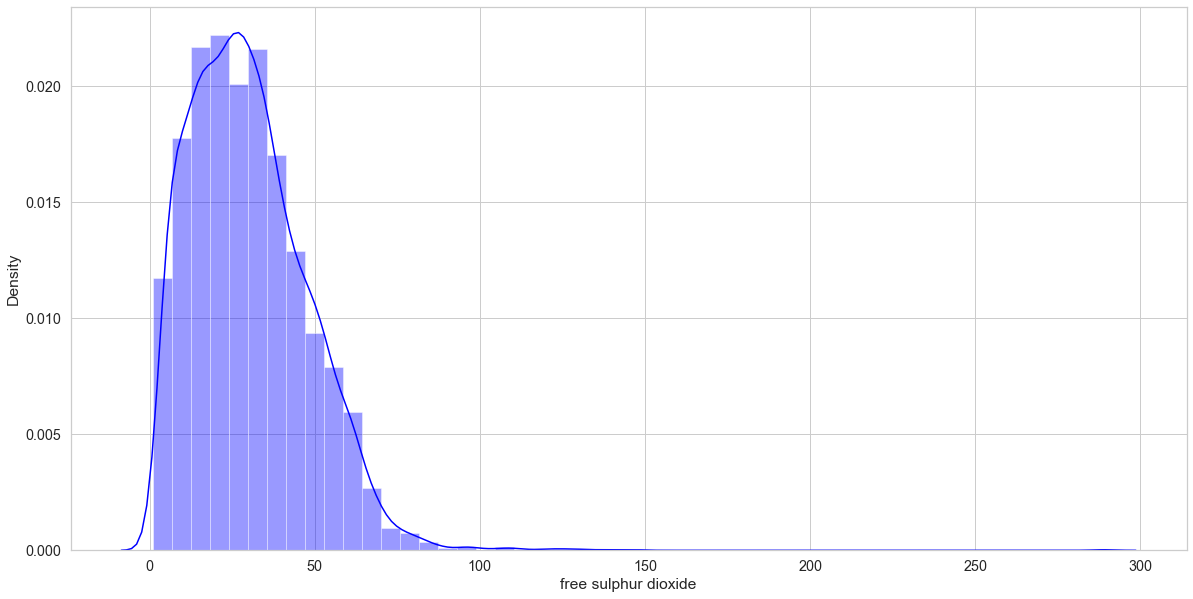

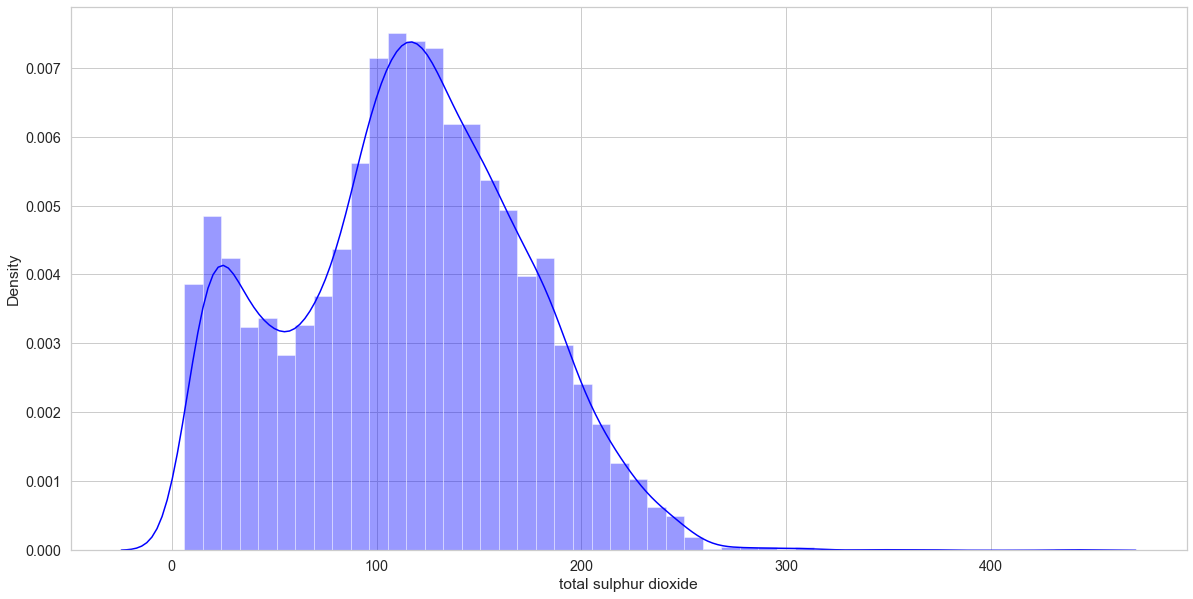

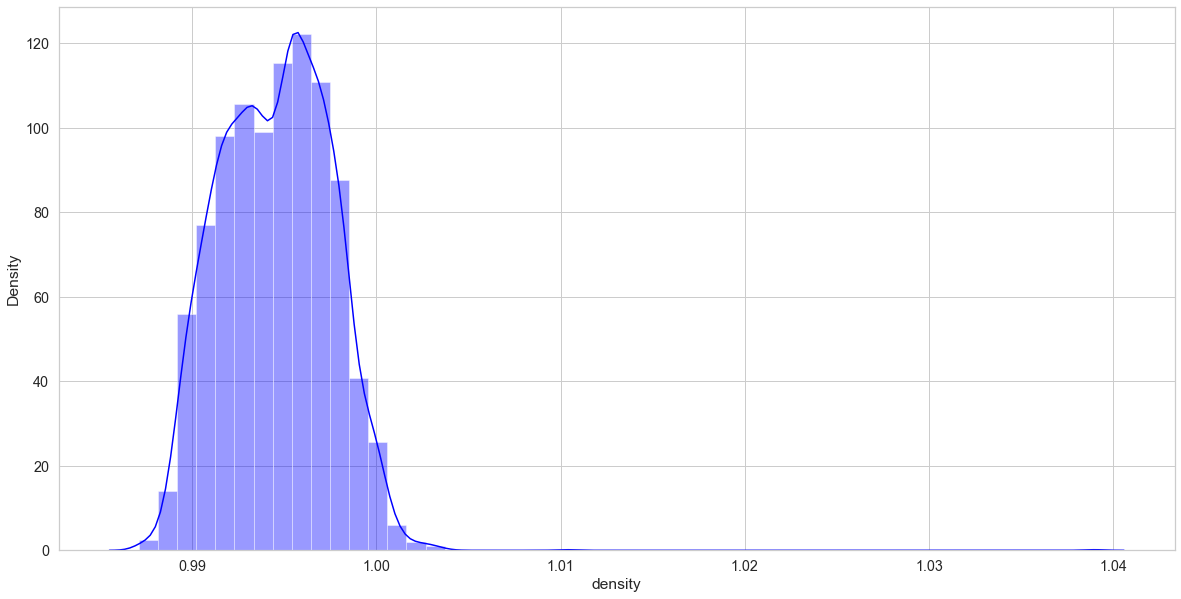

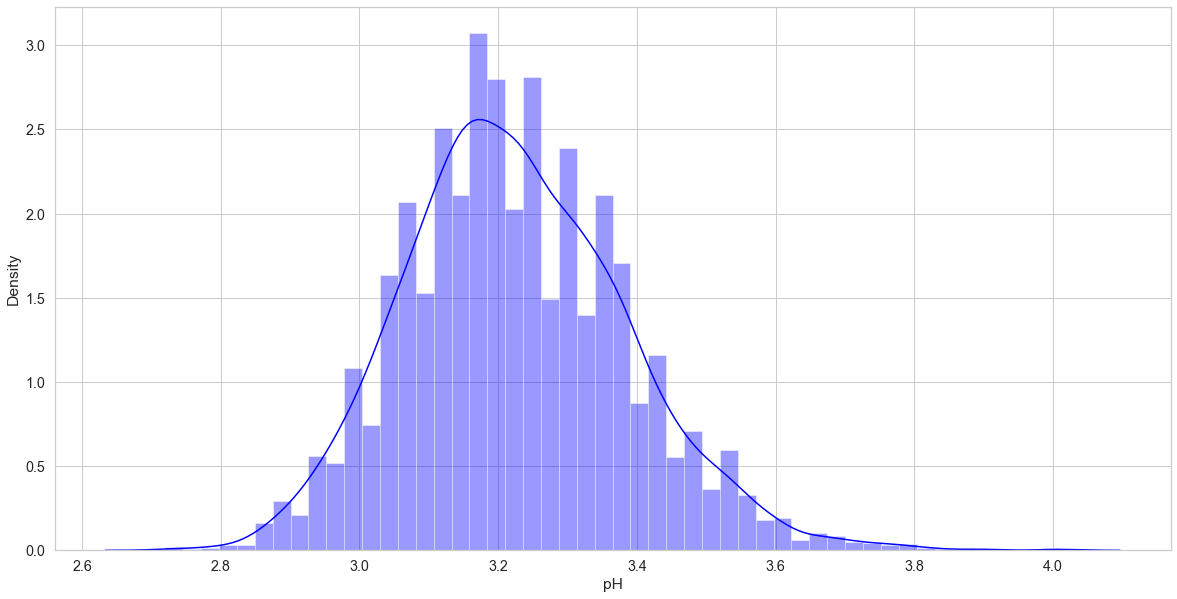

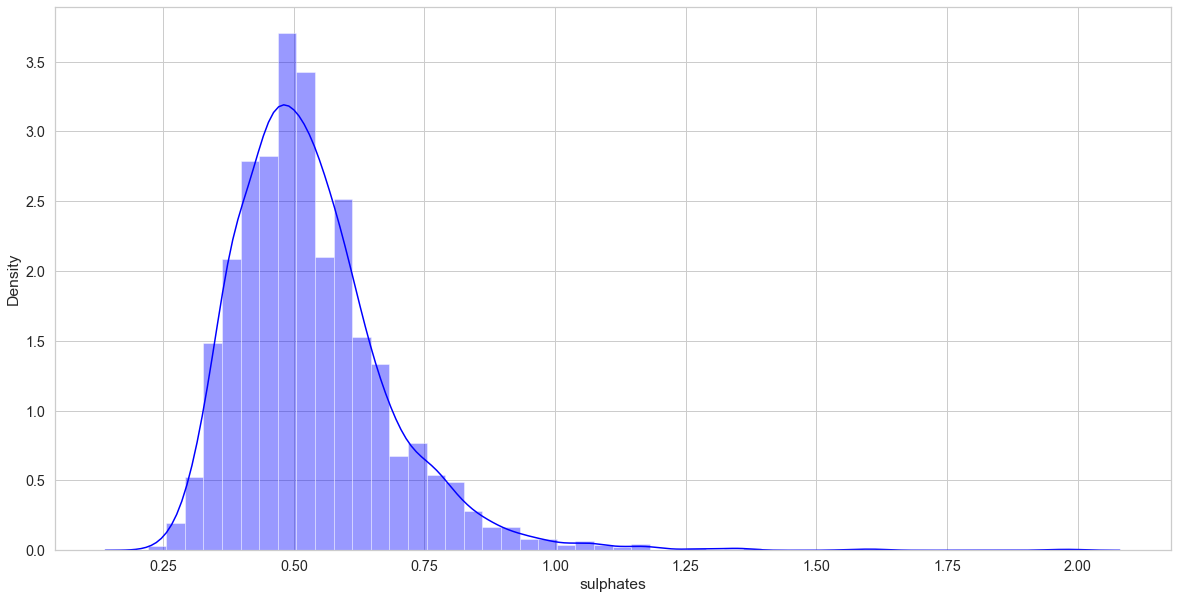

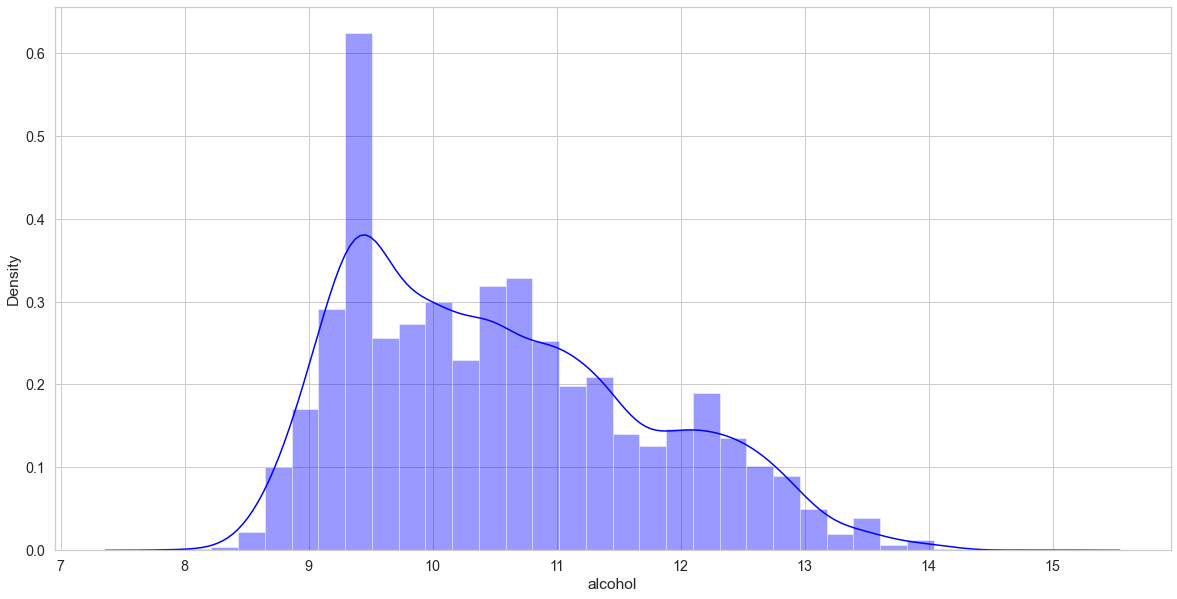

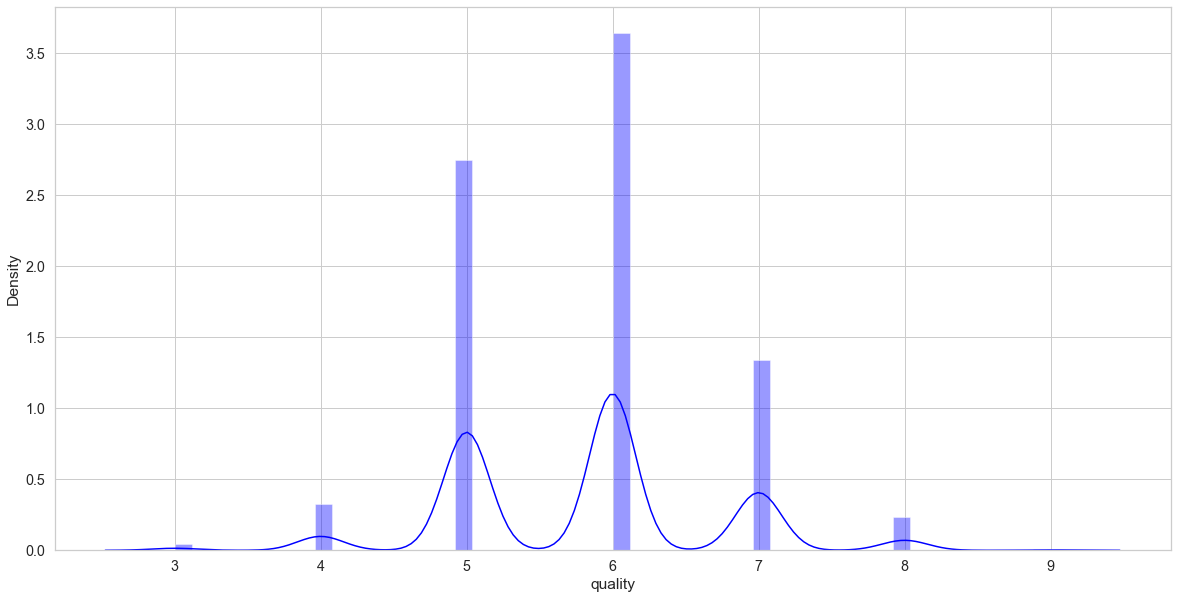

In [22]:
for col in cols:
    plt.figure(figsize=(20,10))
    sns.distplot(df_wine[col], hist=True, kde=True,color='blue', label=None,axlabel=col)
    #plt.xlabel(col,fontdict={'fontsize': 42})
    #plt.title(col,fontdict={'fontsize': 42}) #plotting histograph for each data column using for loop


<AxesSubplot:xlabel='quality', ylabel='count'>

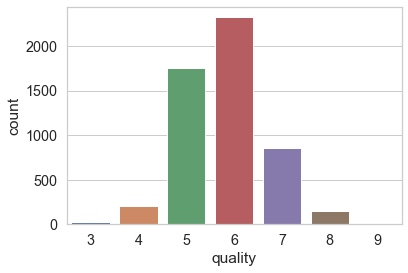

In [64]:
sns.countplot(df_wine['quality'])

<a id=section602></a>
### 6.2 Observation from Univariant Analysis

#### From the **univariant** plots we understood the following;
- **Fixed Acidity** is uniformly distributed with little right skew
- **Volatile Acidity** is right Skewed
- **Citric Acid** is almost normally distributed
- **Residual Sugar** is right skewed
- **Chlorides** is right skewed
- **Free Sulphur Dioxide** is right skewed
- **Total Sulphur Dioxide** id right skewed
- **Density** is slightly not uniform
- **pH** is normally distributed.
- **Sulphates** is right skewed
- **Alcohol** is slightly right skewed.
- **Quality** is hybrid curve with a mixture of small normal distributions.


In order to have clarity on the distribution of each ingredient w.r.t other, lets split the columns and plot pairplot as under;
In both cases, we will understand how each ingredients are distributed as compared to the quality of the wine.

<a id=section603></a>
### 6.3 Bivariant Analysis




In [33]:
cmap=plt.cm.BuGn_r

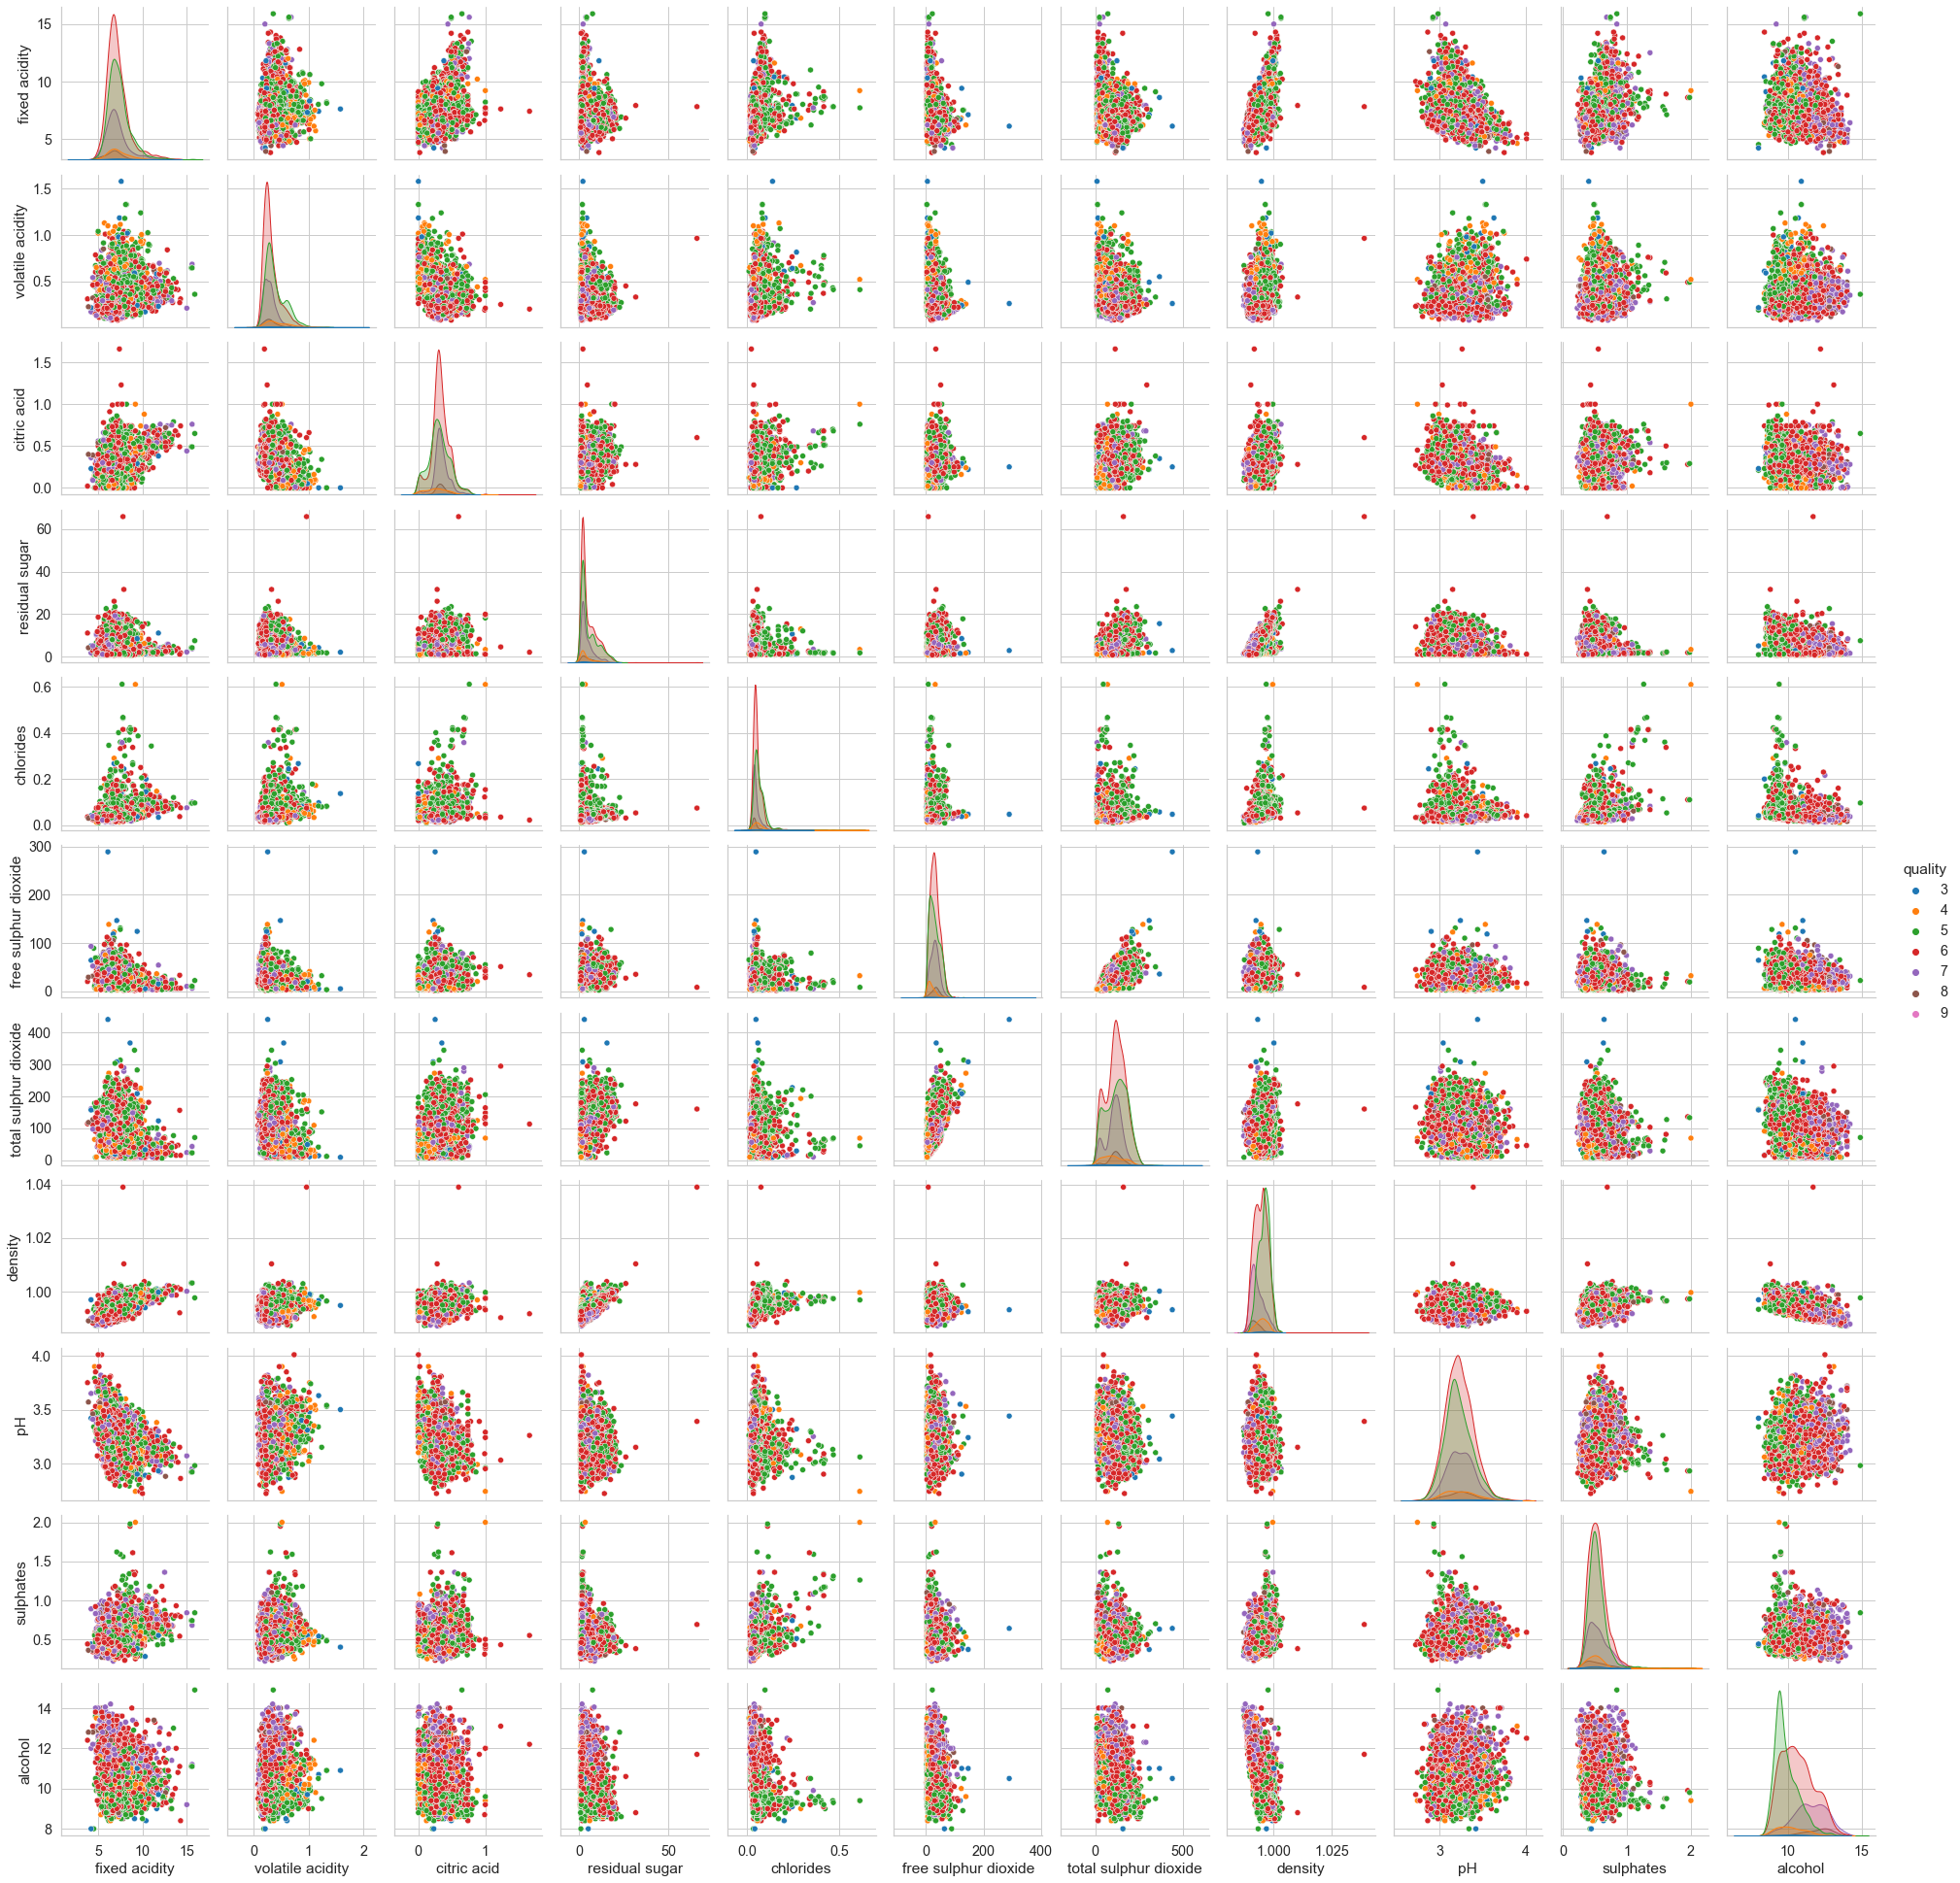

In [35]:
sns.pairplot(df_wine, hue='quality',palette='tab10')

From the above scatterplot from pairplot we noticed that for every quality rating between 1=10, how each ingredients are varying in some range. Now let us understand how these the ingredients are co-related with quality through pair plots and heatmaps

<a id=section604></a>
### 6.4 Plotting Heat Map

<AxesSubplot:>

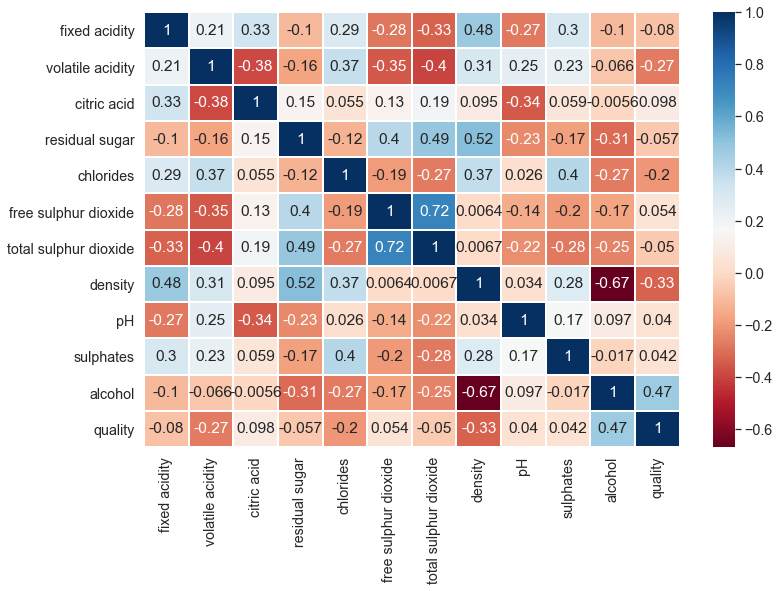

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df_wine.corr(),cmap='RdBu',annot = True,linewidth = 1) #RDBu stands Red and Blue color


### Observations from **heatmap**
- **Alcohol** is the only ingredient that has highest co-relation with **Quality**
- Apart from **Alcohol** there are no ingredients which have high co-relation with **Quality**
- But we noticed lot of ingredients such as **chloride, density, fixed acidity and volatile acidity** have strong negative co-relation with **Quality**.
- We also notice that **Density and Alcohol** have very high negative co-relation
- **Free Sulphur dioxide** has very high positive co-relation with **total Sulphur dioxide**

<a id=section7></a>
# 7. Model Development

In [46]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulphur dioxide,total sulphur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [44]:
X=df_wine.drop(columns='quality')
y=df_wine['quality']

In [80]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X,y, test_size=0.2,stratify=df_wine['quality'], random_state=1)

X_train, X_test, y_train, y_test=split(X,y)

## 7.2 Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [93]:
y_pred_test=logreg.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score
print('accuracy score is :',accuracy_score(y_test,y_pred_test))

accuracy score is : 0.4793233082706767


## 7.2 KNN Classifier Model

In [149]:
import numpy as np
from sklearn.metrics import accuracy_score
accr_list = []
def generate():
    for i in range(1,30):
        knn_model_ = KNeighborsClassifier(n_neighbors = i)
        knn_model_.fit(X_train, y_train)
        pred_i = knn_model_.predict(X_test)
        accr_list.append(accuracy_score(y_test, pred_i))
    
    print("Maximum recall score for the corresponding value of k is",
          max([(v,i+1) for i,v in enumerate(accr_list)]),'respectively.')

generate()

Maximum recall score for the corresponding value of k is (0.4680451127819549, 5) respectively.


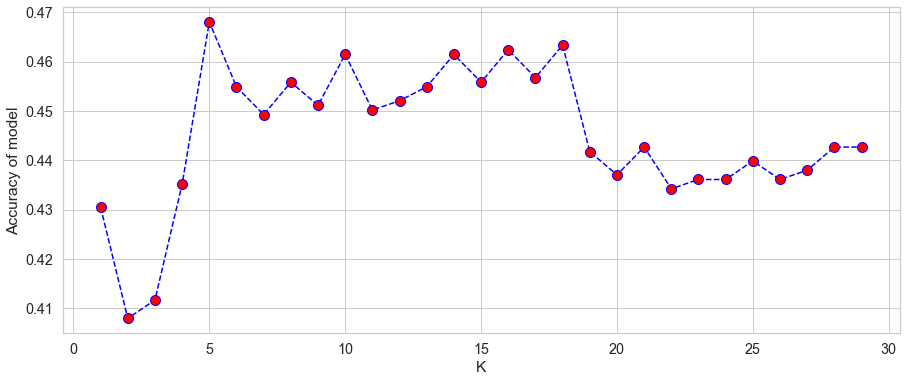

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline
def generate():
    plt.figure(figsize=(15,6))
    plt.plot(range(1,30),accr_list,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
    plt.xlabel('K')
    plt.ylabel('Accuracy of model')
    plt.show()
generate()

In [151]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

In [152]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [153]:
y_preds = knn.predict(X_test)

In [154]:
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(y_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.4680451127819549


In [155]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import numpy as np

param_dist = {"n_neighbors": range(1,30),                             #  specify parameters and distributions to sample from
                  "algorithm" : ["auto", "ball_tree"],
                  "leaf_size" :  2 ** np.arange(10),
                  "metric" : ["euclidean","manhattan","minkowski","chebyshev"]
                 }
    

n_iter_search = 25
knn_model = KNeighborsClassifier(n_neighbors=5)
    
knn_model2=RandomizedSearchCV(knn_model,random_state = 0, param_distributions = param_dist,     
                                    n_iter = n_iter_search,n_jobs = -1)
knn_model2.fit(X_train, y_train)

RandomizedSearchCV(estimator=KNeighborsClassifier(), n_iter=25, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree'],
                                        'leaf_size': array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512], dtype=int32),
                                        'metric': ['euclidean', 'manhattan',
                                                   'minkowski', 'chebyshev'],
                                        'n_neighbors': range(1, 30)},
                   random_state=0)

In [156]:
rand_y=knn_model2.predict(X_test)

In [157]:
knn_accuracy2 = accuracy_score(y_test,rand_y)
print('Accuracy score for the KNN model:', knn_accuracy2)

Accuracy score for the KNN model: 0.48966165413533835


## 7.3 Bagging algorithm using KNN

In [158]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bag_clf = BaggingClassifier(KNeighborsClassifier(n_neighbors=1), n_estimators=50,max_samples=60, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)


print("Accuracy of Simple KNN classifier is {0}".format(accuracy_score(y_test, y_preds)))
print("Accuracy of Bagging classifier is {0}".format(accuracy_score(y_test, y_pred)))

Accuracy of Simple KNN classifier is 0.4680451127819549
Accuracy of Bagging classifier is 0.424812030075188


## 7.4 Bagging using Voting Classifier

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
dtc=DecisionTreeClassifier()
knnc=KNeighborsClassifier()
# here we are using hard voting
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf),('dtc', dtc),('knnc',knnc)],voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC()),
                             ('dtc', DecisionTreeClassifier()),
                             ('knnc', KNeighborsClassifier())])

In [161]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf,dtc,knnc,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.4793233082706767
RandomForestClassifier 0.5601503759398496
SVC 0.4342105263157895
DecisionTreeClassifier 0.4567669172932331
KNeighborsClassifier 0.4680451127819549
VotingClassifier 0.5206766917293233


## 7.4 Boosting algorithm using KNN

In [162]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

reg_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators =50)
reg_ada.fit(X_train, y_train)
predictions = reg_ada.predict(X_test)

In [163]:
print("Accuracy of Boosting classifier is {0}".format(accuracy_score(y_test, predictions)))

Accuracy of Boosting classifier is 0.45300751879699247
